# TASK 6

<b> POINT 1 </b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import timeit
import random
import time

In [2]:
graph = nx.dense_gnm_random_graph(n=100, m=500)

#Random Positive Integer Weights
for (u, v) in graph.edges():
    graph.edges[u, v]['weight'] = np.random.randint(0, 100)

In [3]:
#The matrix contains only 0s and weights as elements.
adjacency_matrix = nx.adjacency_matrix(graph).todense()
adjacency_matrix

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ..., 12, 78,  0],
       ...,
       [ 0,  0, 12, ...,  0,  0,  0],
       [ 0,  0, 78, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int32)

In [4]:
def symmetrical(matrix):
    simetrica=True
    for i in range(0, len(matrix)):
        for j in range(0,len(matrix)):
            if (matrix[i][j] != matrix[j][i]):
                simetrica=False
    return simetrica

In [5]:
symmetrical(adjacency_matrix)

True

{(0, 3): Text(0.9911436114376782, 0.09369064795521428, '10'),
 (0, 7): Text(0.9524135268309206, 0.2128896324625632, '38'),
 (0, 36): Text(0.18128800735542416, 0.3852566079128852, '36'),
 (0, 66): Text(0.23208651252060036, -0.42216390802990605, '18'),
 (0, 72): Text(0.4063093158250433, -0.49114361785509836, '24'),
 (0, 89): Text(0.8852565866339877, -0.3187120309703226, '66'),
 (0, 92): Text(0.9381533242911948, -0.24087685913700455, '55'),
 (1, 16): Text(0.7669267346985188, 0.45355924250609975, '36'),
 (1, 32): Text(0.2861236807389368, 0.48380874851524586, '97'),
 (1, 41): Text(0.07684937540895553, 0.29930862186276275, '98'),
 (1, 53): Text(0.007869725188407561, -0.0622953656330844, '82'),
 (1, 61): Text(0.1137567201897759, -0.28731668155328405, '76'),
 (1, 67): Text(0.2581364392030182, -0.40675804089622086, '34'),
 (1, 86): Text(0.8177252696660171, -0.3538614224483023, '0'),
 (2, 21): Text(0.6204023437247319, 0.5469581890770946, '83'),
 (2, 31): Text(0.311995106412747, 0.527554850789733

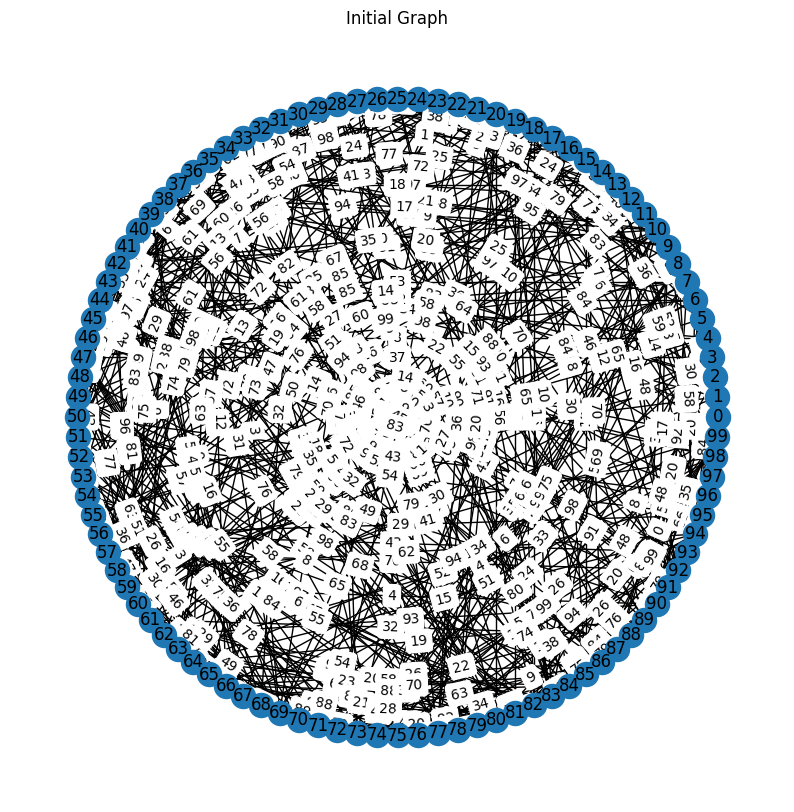

In [6]:
edge_weights={(u,v):graph[u][v]['weight'] for  u,v in graph.edges()}
pos = nx.circular_layout(graph)
plt.figure(figsize=(10, 10))
plt.title('Initial Graph')
nx.draw(graph,pos,with_labels=True, node_color='tab:blue')
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_weights)

In [7]:
def dijkstra_path(graph, source, target):
    return nx.dijkstra_path(G=graph, source=source, target=target)

def bellman_ford_path(graph, source, target):
    return nx.bellman_ford_path(G=graph, source=source, target=target)

In [8]:
source=np.random.randint(0, 100)
target=np.random.randint(0, 100)

print('Dijkstra Algorithm:', dijkstra_path(graph, source, target))
print('Bellman-Ford Algorithm:', bellman_ford_path(graph, source, target))

Dijkstra Algorithm: [55, 58, 35, 76, 89, 20, 78]
Bellman-Ford Algorithm: [55, 58, 35, 76, 89, 20, 78]


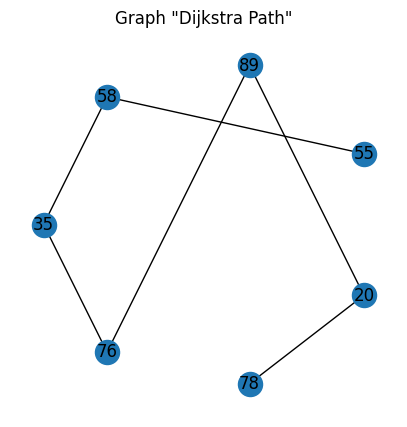

In [9]:
plt.figure(figsize=(5, 5))
plt.title('Graph "Dijkstra Path"')
nx.draw_shell(graph.subgraph(dijkstra_path(graph, source, target)), with_labels=True, node_color='tab:blue')

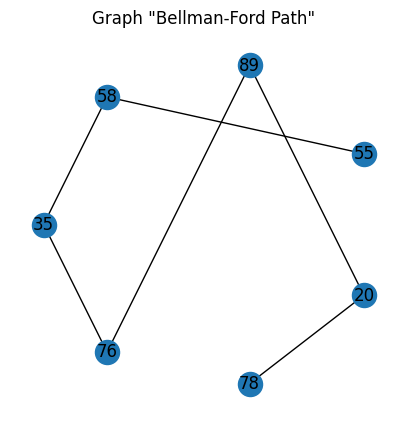

In [10]:
plt.figure(figsize=(5, 5))
plt.title('Graph "Bellman-Ford Path"')
nx.draw_shell(graph.subgraph(bellman_ford_path(graph, source, target)), with_labels=True, node_color='tab:blue')

In [11]:
time

<module 'time' (built-in)>

In [12]:
time = pd.DataFrame()

#We repet the experiment 10 times for the same starting vertex.
for i in range(0, 10):
    time.loc[i, 'Dijkstra_path'] = timeit.timeit(
        'dijkstra_path(graph, source, target)',
        setup='from __main__ import dijkstra_path, graph, source, target',
        number=1
    )
    
    time.loc[i, 'Bellman_Ford_path'] = timeit.timeit(
        'bellman_ford_path(graph, source, target)',
        setup='from __main__ import bellman_ford_path, graph, source, target',
        number=1
    )

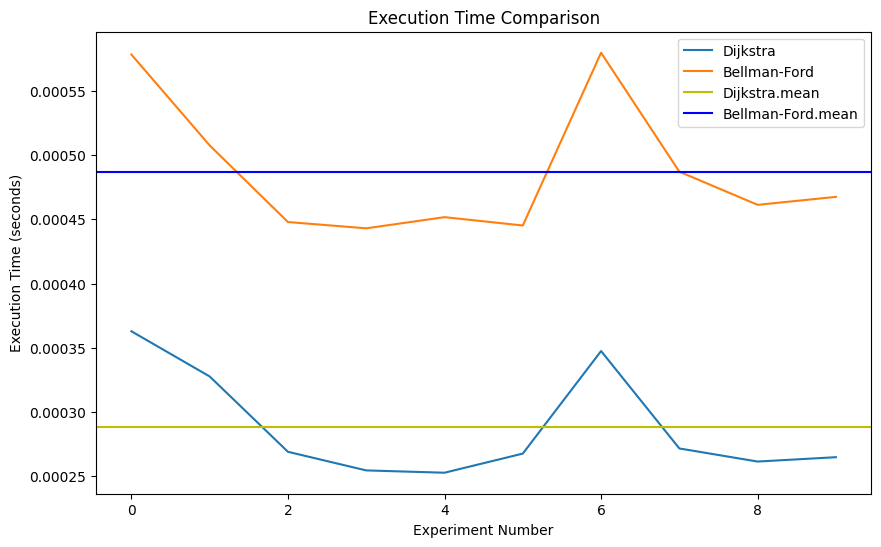

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(range(0, 10), time['Dijkstra_path'], label='Dijkstra')
plt.plot(range(0, 10), time['Bellman_Ford_path'], label='Bellman-Ford')
plt.xlabel('Experiment Number')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time Comparison')
plt.axhline(y=time['Dijkstra_path'].mean(), label='Dijkstra.mean',color='y')
plt.axhline(y=time['Bellman_Ford_path'].mean(), label='Bellman-Ford.mean',color='b')
plt.legend()
plt.show()

In [14]:
time.mean()

Dijkstra_path        0.000288
Bellman_Ford_path    0.000487
dtype: float64

In [15]:
#The time of Dijkstra path is shorther than Bellman-Ford path.
time["Dijkstra_path"].mean()<time["Bellman_Ford_path"].mean()

True

<b> POINT 2 </b>

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math

In [17]:
#Generate 10 * 20 cell grid with 40 obstacle cells

In [18]:
#define create function
def create_and_show(rows, cols, obstacle_count):
    G = nx.grid_2d_graph(rows, cols)
    
    for edge in G.edges:
        G.edges[edge]['weight'] = 1.0

    diagonals = [((x, y), (x+1, y+1)) for x in range(rows-1) for y in range(cols-1)]
    G.add_edges_from(diagonals, weight=1.4)
    G.add_edges_from([((x+1, y), (x, y+1)) for x in range(rows-1) for y in range(cols-1)], weight=1.4)

    pos = nx.spring_layout(G, iterations=1000, seed=41)
    nx.draw(G, pos, node_size=20)
    plt.show()
    
    obstacles = []
    while len(obstacles) != obstacle_count:
        point = (np.random.randint(0, rows - 1), np.random.randint(0, cols - 1))
        if point not in obstacles:
            obstacles.append(point)

    G.remove_nodes_from(obstacles)
    print("Obstacle cells", obstacles)

    nx.draw(G, pos, node_size=20)
    plt.show()
    return G,obstacles,pos

#define visualize function
def visualize_graph(G, obstacles, pos, title):
    node_color = ['g' if node not in obstacles else 'r' for node in G.nodes]
    nx.draw(G, pos, node_size=10, node_color=node_color, with_labels=False)
    plt.title(title)
    plt.show()

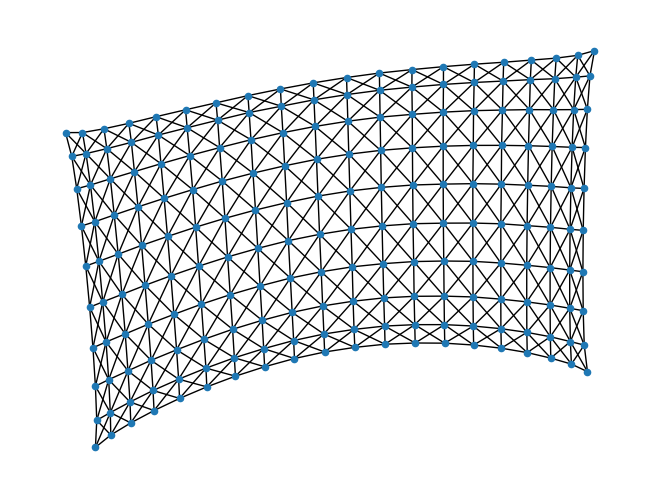

Obstacle cells [(7, 5), (0, 16), (3, 17), (2, 8), (6, 1), (4, 10), (2, 15), (1, 6), (3, 7), (1, 0), (0, 3), (7, 14), (8, 10), (7, 3), (7, 2), (2, 2), (4, 5), (0, 14), (5, 6), (0, 17), (0, 7), (8, 16), (0, 2), (8, 9), (2, 6), (5, 1), (8, 7), (3, 14), (1, 17), (5, 17), (2, 10), (8, 1), (0, 8), (3, 4), (4, 11), (0, 10), (3, 2), (8, 12), (6, 7), (6, 6)]


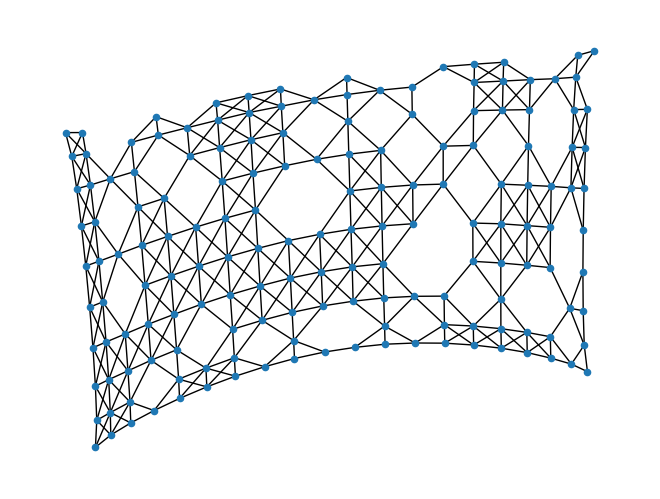

In [19]:
rows = 10
cols = 20
obstacle_count = 40
G,obstacles,pos = create_and_show(rows, cols, obstacle_count)

Find path from (6, 14) to (2, 1)
Founded path: [(6, 14), (6, 13), (6, 12), (6, 11), (6, 10), (5, 9), (5, 8), (5, 7), (4, 6), (3, 5), (2, 4), (2, 3), (1, 2), (2, 1)]



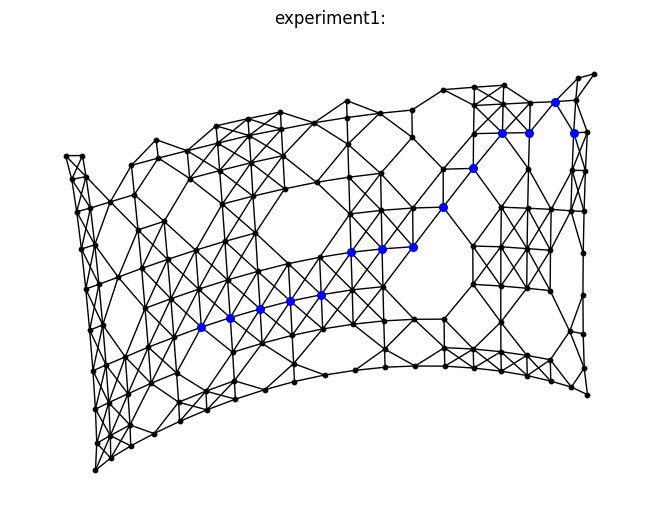

Find path from (4, 6) to (4, 4)
Founded path: [(4, 6), (3, 5), (4, 4)]



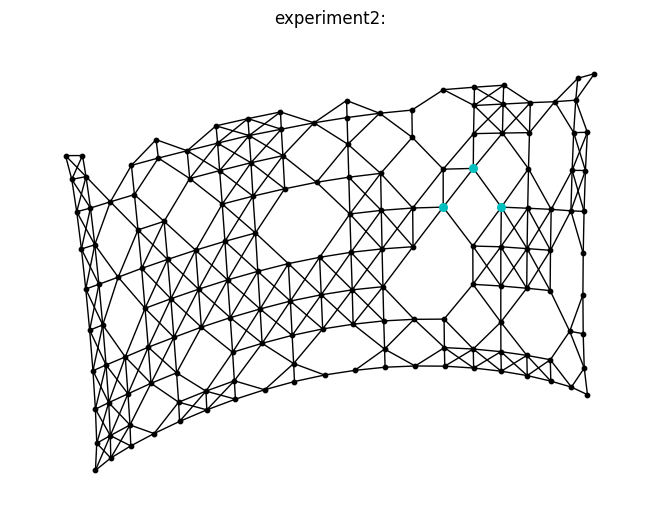

Find path from (7, 1) to (6, 5)
Founded path: [(7, 1), (6, 2), (6, 3), (6, 4), (6, 5)]



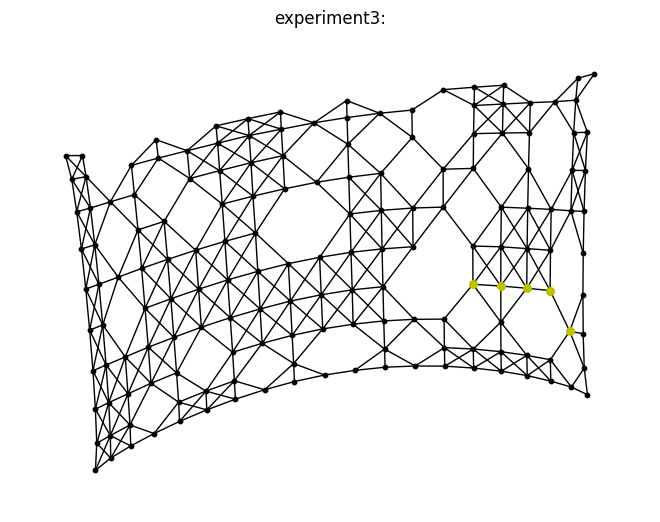

Find path from (6, 4) to (0, 6)
Founded path: [(6, 4), (5, 4), (4, 4), (3, 5), (2, 5), (1, 5), (0, 6)]



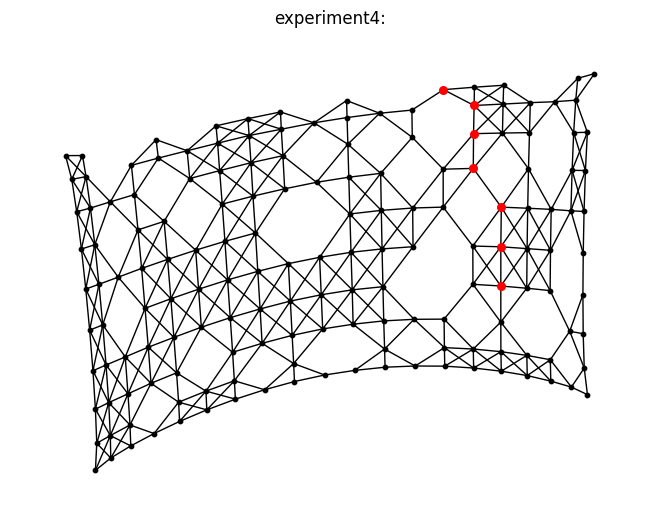

Find path from (0, 4) to (1, 18)
Founded path: [(0, 4), (0, 5), (0, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (2, 17), (1, 18)]



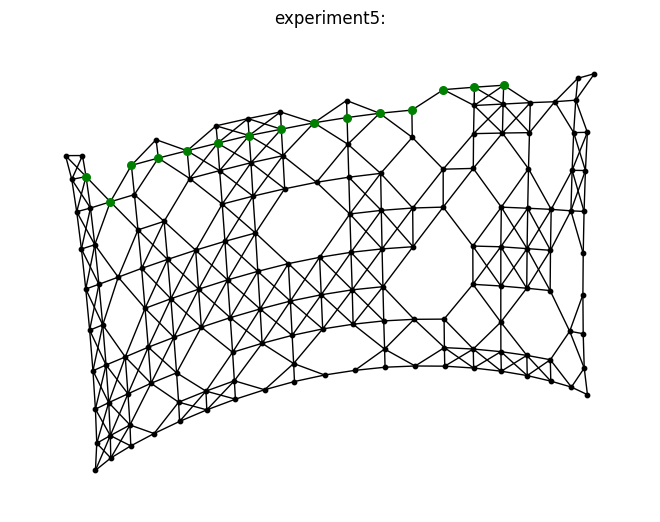

In [20]:
# loop for finding 5 random paths 
def heuristic(node, goal):
    x1, y1 = node
    x2, y2 = goal
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
    
def shortest_path(start, goal):
    print(f'Find path from {start} to {goal}')
    shortest_path = nx.astar_path(G, start, goal, heuristic=heuristic)
    print(f'Founded path: {shortest_path}\n')
    return shortest_path
    
# visualize
def visualize_graph_with_path(G, pos):

    all_path = []
    color_list = ['b', 'c', 'y', 'r', 'g']
    for i in range(5):
        while True:
            start = tuple(np.random.randint(0, (rows - 1, cols - 1)))
            goal = tuple(np.random.randint(0, (rows - 1, cols - 1)))
            if (start not in obstacles) and (goal not in obstacles):
                break          
        
        nx.draw(G, pos, node_size=10, node_color='k')
        nx.draw_networkx_nodes(G, 
                               pos, 
                               nodelist=shortest_path(start, goal), 
                               node_color=color_list[i], 
                               node_size=30)
        plt.title(f'experiment{i+1}:')
        plt.show()

visualize_graph_with_path(G, pos)